# Исследование объявлений о продаже квартир

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/Users/ruslangayfullin/DA_New/YP/project_3_spb_flats/real_estate_data.csv', sep='\t' )

In [3]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<b> По результатам первичного изучения данных из файла можно установить следующие факторы: </b>
- в датасете присутствует 23699 записей о квартирах в Санкт-Петербурге
- у каждой записи о квартире есть 22 параметра
- в датасете присутствуют пропущенные значения в категориях: `ceiling_height` , `floors_total`,`living_area`, `is_apartment`, `kitchen_area`,`balcony`,`locality_name`, `airports_nearest`,`parks_around3000`,`parks_nearest`, `ponds_around3000 `,`days_exposition`
- значания столбца` first_day_exposition` записаны имеют тип данных "object", не смотря на то, что это показатель времени
- значения столбца `"is_apartement"` также имеют тип данных 'object', при этом они отражают принадлежность квартиры к категории "апартаменты"

## Предобработка данных

- Определение и изучение пропущенных значений
- Заполнение пропусков, определение причин, которые могли привести к пропускам в данных
- Приведите данные к нужным типам

In [5]:
#переименуем некорректное название столбца
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

Для начала проверим на дубликаты единственную текстовую инфромацию в датасете - название населенного пункта

In [6]:
list(data['locality_name'].unique())


['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

 В данных с названиями населенных пунктов присутствуют неявные дубликаты,из-за использования буквы "ё" и "е" в слове "поселок". Заменим букву "ё"

In [7]:
data['locality_name'].value_counts().count()

364

In [8]:
data['locality_name']= data['locality_name'].replace('ё','е', regex=True)

In [9]:
data['locality_name'].value_counts().count()

330

В результате операции над данными - удалено 34 дубликата в названиях

Далее - заполение пропусков и исправление некорректных значений в столбце с высотой потолков

In [10]:
print('Количество пропусков значений высоты потолков:',data['ceiling_height'].isna().sum())
print('Максимальное значение высоты потолков:',data['ceiling_height'].max() )
print('Минимальное значение высоты потолков:',data['ceiling_height'].min())


Количество пропусков значений высоты потолков: 9195
Максимальное значение высоты потолков: 100.0
Минимальное значение высоты потолков: 1.0


Из данных видно что в показателях выосты потолков есть как слишком высокие так и слишком низкие значения.

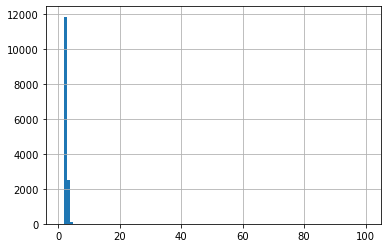

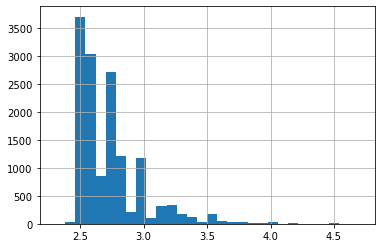

In [11]:
data['ceiling_height'].hist(bins=100)
plt.show()
data['ceiling_height'].hist(bins=30, range = (2.3,4.7))
plt.show()

На гистограммах видно что большинство данных о высоте потолков являются корректными - от 2,4 до 4,5 метров

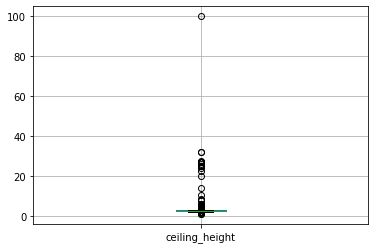

In [12]:
data.boxplot('ceiling_height')
plt.show()


In [13]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [14]:
len(data.query('ceiling_height < 2.4 or ceiling_height > 4.5'))

63

Графики показывают, что большинство значений высоты потолков являются реалистичными и входят в диапозон от 2.5 до 2.8 метров, при этом  в датасете есть 63 квартиры в которых неадекватнто высокие или низкие значения.

Заменим значения высоты потолков на медианные значения по городам. Это справедливо, так как малые города и села вблизи Санкт-Петербурга застраивались по типовым проектам серийными зданиями и высота потолков стремится к медианному значению. Первый шаг - проверка пропусков в названиях населенных пунктов

In [15]:
print(data['locality_name'].isna().sum())

49


In [16]:
#учитывая наличие пропусков в данных по названием 49 городов, заменим пропуски на наименование unknown
data['locality_name'] = data['locality_name'].fillna('unknown')

In [17]:
#создаем сводную таблицу по медианной высоты потолков для каждого города
ceiling_locality_median = data.groupby('locality_name')['ceiling_height'].median().reset_index()
ceiling_locality_median

,locality_name,ceiling_height
0,unknown,2.875
1,Бокситогорск,3.900
2,Волосово,2.500
3,Волхов,2.580
4,Всеволожск,2.700
...,...,...
326,село Путилово,2.550
327,село Рождествено,NaN
328,село Русско-Высоцкое,2.600
329,село Старая Ладога,NaN


In [18]:
# функция, меняющая пропущенное значение на медианное из подготовленной таблицы
def ceiling_median (row):
    if np.isnan(row['ceiling_height']):
        return float(ceiling_locality_median.loc[ceiling_locality_median['locality_name'] == row['locality_name']]['ceiling_height'])
    return  row['ceiling_height'] 

In [19]:
#применение функции
data['ceiling_height'] = data.apply(ceiling_median, axis = 1)

In [20]:
#рассчет количества оставшихся пропусков после применения функции
print(data['ceiling_height'].isna().sum())

106


In [21]:
#замена пропусков медианными значениями в целом по датасету
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [22]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.732567
std          1.001641
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [23]:
#замена некорректных значений высоты потолков - на медиану
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] > 2.4, 2.7) 
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 4.5, 2.7)                                                   

In [24]:
len(data.query('ceiling_height < 2.4 or ceiling_height > 4.5'))

0

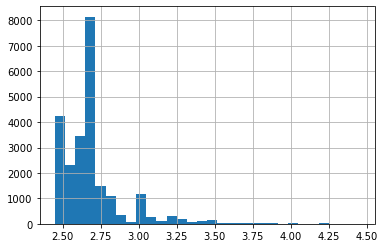

<AxesSubplot:>

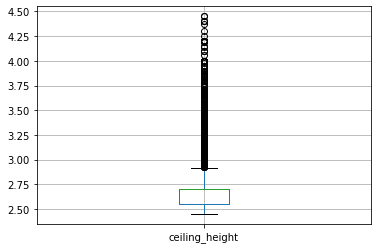

In [25]:
data['ceiling_height'].hist(bins=30)
plt.show()
data.boxplot('ceiling_height')

Предобработав столбец с высотой квартир методом .where(), большинство выбросов заменены на медианное значение. Пропуски заменены на медианные значения по населенному пункту. Учитывая специфику застройки Санкт-Петербурга и пригородов, можно предположить что в датасете преимущественно дома типовой застройки, и средние значения высоты потолков будут справедливы для пропусков каждого отдельного населенного пункта. В реальных условиях - необходимо направить запрос разработчикам, для установления информации о пропусках, так как в датасете могут все-таки встречаться высоты потолков в домах нетиповых проектов (историческая застройка Санкт-Петербурга) и правильно получить эти данные корректным образом

In [26]:
#проверим пропуски количества этажей в домах
print('Количество пропусков в значениях количества этажей в здании:',len(data[data['floors_total'].isna()]['floors_total']))
data[data['floors_total'].isna()].value_counts('locality_name')


Количество пропусков в значениях количества этажей в здании: 86


locality_name
Санкт-Петербург                    70
поселок Мурино                      4
Красное Село                        2
Кудрово                             2
unknown                             1
городской поселок Новоселье         1
деревня Новое Девяткино             1
поселок Бугры                       1
поселок Стрельна                    1
поселок Шушары                      1
поселок Щеглово                     1
поселок городского типа Токсово     1
dtype: int64

Заполнять значения этажности медианными или средними значениями будет некорректным, так как может сложиться ситуация, при которой медианное значение будет больше, чем занчение этажа квартиры. На данном этапе пропуски не будут отброшены, так как в данных хранится иная полезная информация для аггрегирования и анализа

In [27]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

пропуски в столбце is_apartment вероятно свидетельствуют о том, в данном столбце переменная принимает значение True в случае, если квартира является апартаметрами, в противном случае - переменная должна принимать значение False

In [28]:
#заполним пропуски значением False
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

In [29]:
#заполнение пропусков количества балконов значением  0
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [30]:
#аналогичным образом заполним пропуски в данных о парках и прудах, расположеных вблизи 3000 метров
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

Пропуски в значениях столбца days_exposition вероятно свидетельствуют о том, что квартира на момент выгрузки архива не была снята с продажи. Иными словами, <b><u> факт сделки не состоялся </u></b> и анализ по параметров и их влияния на рыночную стоимость проводить по таким данным - некорректно. Следовательно такие данные <b> можно удалить </b>

In [31]:
data = data.dropna(subset=['days_exposition'])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20518 non-null  int64  
 1   last_price            20518 non-null  float64
 2   total_area            20518 non-null  float64
 3   first_day_exposition  20518 non-null  object 
 4   rooms                 20518 non-null  int64  
 5   ceiling_height        20518 non-null  float64
 6   floors_total          20441 non-null  float64
 7   living_area           18813 non-null  float64
 8   floor                 20518 non-null  int64  
 9   is_apartment          20518 non-null  bool   
 10  studio                20518 non-null  bool   
 11  open_plan             20518 non-null  bool   
 12  kitchen_area          18443 non-null  float64
 13  balcony               20518 non-null  float64
 14  locality_name         20518 non-null  object 
 15  airports_nearest   

После заполения пропусков остались пропущенные значения в 6 столбцах Это living_area, kitchen_area, airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest. Значения данных пропусков являются случайными и не зависят от иной доступной информации в датасете. Заполнение их медианными значениями так же не является корректным, так как наиболее распространенные значения не обязательно свидетельствуют о корректности данных для каждой конкретной квартиры, а большое количество пропусков может исказить дальнейшие результаты анализа

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

## Расчёты и добавление результатов в таблицу

3. Посчитаем и добавим в таблицу
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [34]:
#создание столбца с ценой 1 кв.м
data['one_meter_price'] = data['last_price'] / data['total_area']
# создание столбцов с днем недели, месяцем и годом публикации 
data['week_day_exposition'] = data['first_day_exposition'].dt.dayofweek
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [35]:
#создадим функцию, которая проверяет этаж и добавляет в столбец значения "первый", "последний", "другой"
def floor_chek(row):
    if row['floor'] == 1:
        return "Первый"
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

In [36]:
data['floor_type'] = data.apply(floor_chek, axis=1)

In [37]:
#создадим столбцы с соотношением жилой и общей площади, площади кухни к общей
data['living_total_ratio'] = data['living_area']  / data['total_area']
data['kitchen_total_ratio'] = data['kitchen_area'] / data['total_area']

In [38]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,living_total_ratio,kitchen_total_ratio
1,7,3350000.0,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0.0,городской поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,Другой,0.473684,0.299342


## Исследовательский анализ данных

* Изучение следующих параметров: площадь, цена, число комнат, высота потолков.

total_area


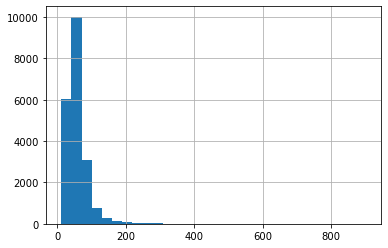

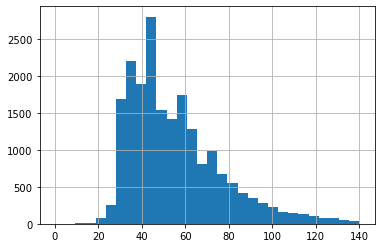

last_price


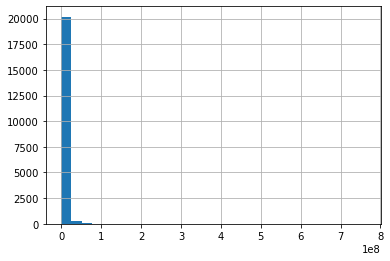

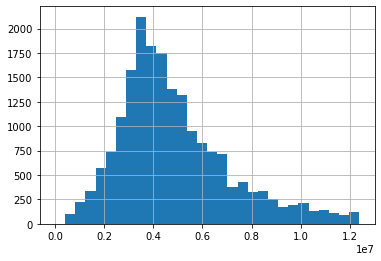

one_meter_price


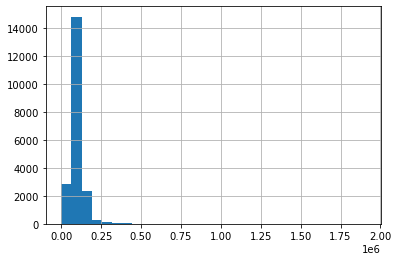

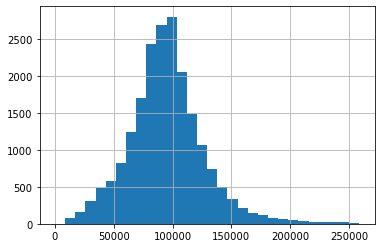

rooms


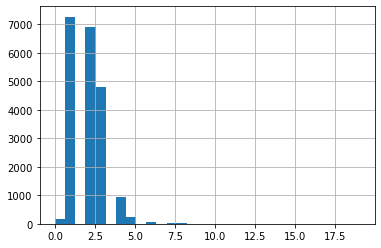

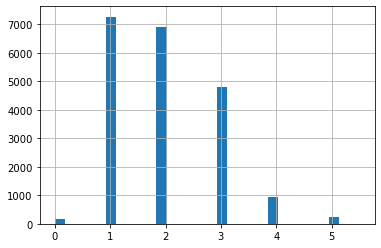

ceiling_height


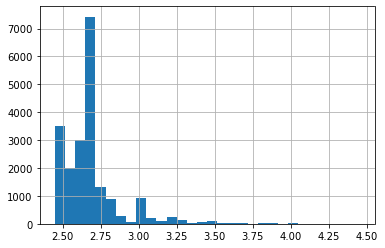

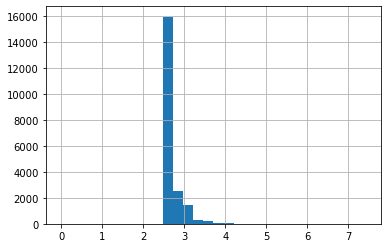

In [39]:
#создание цикла построения гистограмм для всего набора данных и с ограничением ОХ до значений Q3+ 1.5 межквартильных размаха
hist_list=['total_area','last_price', 'one_meter_price', 'rooms', 'ceiling_height']
for i in hist_list:
    print(i)
    data[i].hist(bins=30)
    plt.show()
    data[i].hist(bins=30, range=(0,data[i].median()*(1.25+1.5)))
    plt.show()


В результате построения гистограмм по данным столбцов площадь, цена, число комнат и высота потолков можно сделать следующие выводы:
- По всему датасету наиболее распространенными являются сделки с квартирами до 100 квадратных метров. При этом в наборе сущесвтуют отдельные единичные случаи с квартирами площадью выше 200 квадратных метров
- Абсолютные значения цены квартиры чаще всего входят в диапозон от 2 до 7 млн рублей. Свыше 10 млн рублей сделки по квартирам предельно малочисленны
- Стоимость квадратного метра квартиры стремится к нормальному распределению. Наиболее частая цена входит в диапозон от  5 до 15 тыс. рублей за кв.м.
- Больше всего сделок совершено с квартирами, в которых количество комнат от 1 до 3. При этом в датасете есть единичные квартиры с чрезмерно высокими параметрами количества комнат. Учитывая иторическую застройку Ленобласти и Санкт-Петербурга, комнат может быть и нетипично много, однако такие данные требуют дополнительной проверки
- Высота потолков чаще всего принимает значение от 2,4 до 2,75 метра. При этом наблюдается еще один пик на значении 3 метра. Выше этого значения квартиры практически не встречаются 


Изучение времени продажи квартиры, определение того, сколько обычно занимает продажа

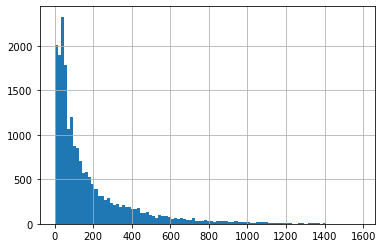

In [40]:
data['days_exposition'].hist(bins=100);


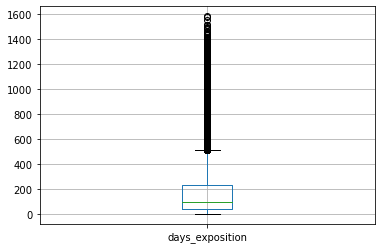

In [41]:
data.boxplot('days_exposition')
plt.show()


In [42]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

По результатам анализа времени продажи квартир можно сделать следующие выводы:
- С увеличением времени экспонирования квартиры - снижается количество завершенных сделок по продаже
- Медианное значение времени продажи составляет 95 дней, самые быстрые продажи занимают не более одного дня, самая долгое время продажи - 1589 дней.
- Судя по набору данных, все сделки, которые были совершены менее чем за 45 дней (Q1) можно считать быстрыми, а в случае, если объявление находилось на сайте дольше 232 дней (Q3) - долгими



count    18769.000000
mean       127.145080
std        119.259737
min          1.000000
25%         41.000000
50%         84.000000
75%        181.000000
max        500.000000
Name: days_exposition, dtype: float64

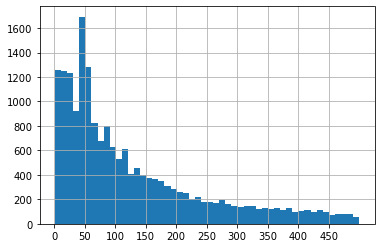

In [43]:
days_exposition_good = data.query('days_exposition <= 500')['days_exposition']
days_exposition_good.hist(bins=50)
plt.xticks(np.arange(0,500, 50))
days_exposition_good.describe()

По результатам анализа, можно сделать вывод о том, что все значения времени более 500 дней являются выбросами. Исключив выбросы, можно отметить что наибольшая частотность времени продажи квартир составляет 50 дней. Медианное время продажи составляет 84 дня, а среднее время 127 дней. Разница в значениях может быть объяснена высоким стандартным отклонением. В числовом наборе данных явно видно преобладание количества сделок, которые заняли менее 150 дней.

* Определим какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Изучим зависимость от даты размещения: дня недели, месяца и года.

In [44]:
price_param_corr = data[['last_price', 'total_area','one_meter_price','rooms', 'city_centers_nearest']]
price_param_corr.corr()


,last_price,total_area,one_meter_price,rooms,city_centers_nearest
last_price,1.000000,0.643127,0.736485,0.353990,-0.193437
total_area,0.643127,1.000000,0.304522,0.759554,-0.225614
one_meter_price,0.736485,0.304522,1.000000,0.052605,-0.317436
rooms,0.353990,0.759554,0.052605,1.000000,-0.181681
city_centers_nearest,-0.193437,-0.225614,-0.317436,-0.181681,1.000000


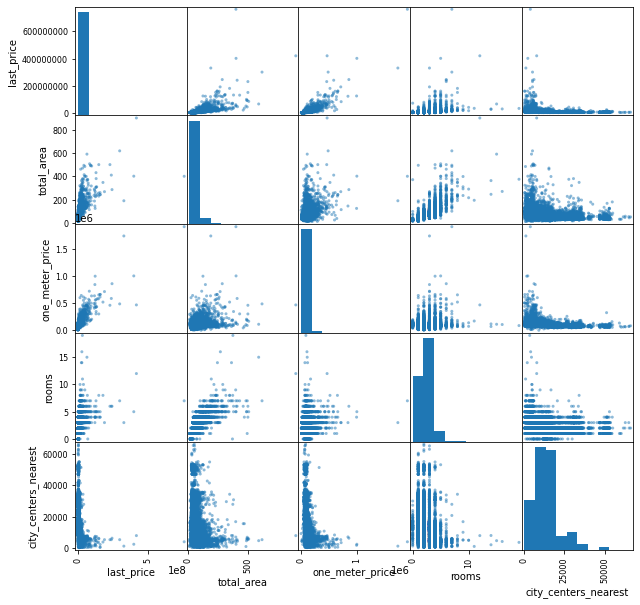

In [45]:
pd.plotting.scatter_matrix(price_param_corr,figsize=(10,10));

По итогам анализа коэффицента корреляции и графика рассеивания можно сделать следующие выводы:
- очевидно что на конечную цену квартиры влияет ее площадь. Коэфф. корелляции принимает значение 0.6 что является довольно высоким значением. При этом сверхдорогие квартиры, выше 40 млн рублей, находятся в сегменте квартир площадью более 500 метров
- количество комнтат в меньшей степени чем общая площадь, но все же влияет на конечную стоимость квартиры. Коэфф. корреляции тут составляет 0.3
- Расстояние от центра влияет как на конечную стоимость квартиры, так и на стоимость квадратного метра жилья. При этом корреляция отрицатиельная и принимает значение -0.19 и -0.3 соответственно. Следовательно, чем меньше значение расстояния от центра, тем больше стоимость лота

In [46]:
price_year_corr = data[['one_meter_price','last_price','week_day_exposition', 'month_exposition', 'year_exposition']]
price_year_corr.corr()

,one_meter_price,last_price,week_day_exposition,month_exposition,year_exposition
one_meter_price,1.000000,0.736485,0.000555,0.007033,-0.010628
last_price,0.736485,1.000000,0.004637,0.005631,-0.061122
week_day_exposition,0.000555,0.004637,1.000000,0.009927,0.006024
month_exposition,0.007033,0.005631,0.009927,1.000000,-0.196851
year_exposition,-0.010628,-0.061122,0.006024,-0.196851,1.000000


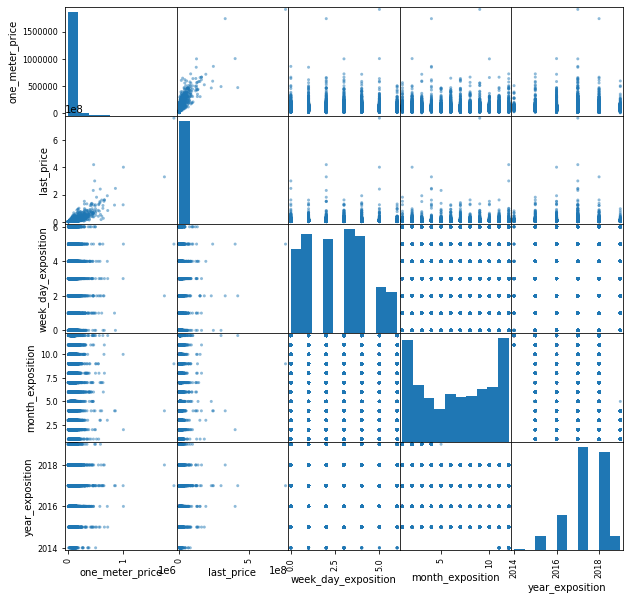

In [47]:
pd.plotting.scatter_matrix(price_year_corr, figsize=(10,10));

корреляция между стоимостью квартиры и датой публикации объявления является несущественной и можно говорить о ее отсутствии. При этом график рассеивания говорит о том, что самые дорогие квартиры были выставлены на продажу начиная с 2016 года и чаще всего в первые и последние месяцы в году


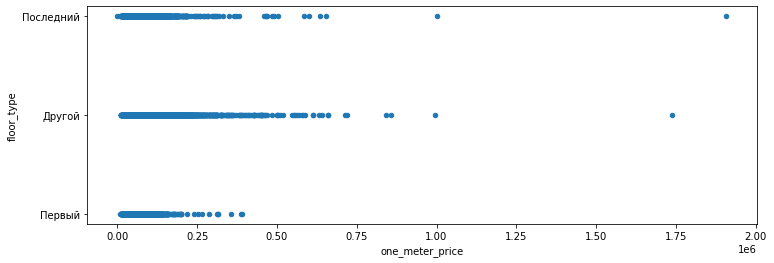

In [48]:
data[['one_meter_price','floor_type']].plot(x='one_meter_price', y='floor_type',kind='scatter',figsize=(12,4));

График рассеивания стоимости квартир в зависимости от этажности, показывает что стоимость квадратного метра для квартир не на первом или последнем этаже чаще принимает более высокие значения. При этом квартир на первом этаже не встречется выше 50 000 рублей за кв.метр в принципе

* Определим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [49]:
data_new = data.pivot_table(index='locality_name', values='one_meter_price', 
                 aggfunc= ['count','median'])
data_new.columns = ['total_offers','one_meter_median']
data_new = data_new.sort_values(by='total_offers',ascending=False).head(10).reset_index()
data_new


,locality_name,total_offers,one_meter_median
0,Санкт-Петербург,13638,103057.329802
1,поселок Мурино,551,86075.949367
2,поселок Шушары,408,76220.394737
3,Всеволожск,339,65789.473684
4,Колпино,308,74005.089610
5,Пушкин,307,97938.144330
6,поселок Парголово,302,91387.362637
7,деревня Кудрово,299,91860.465116
8,Гатчина,268,67180.706522
9,Выборг,208,56960.594315


In [50]:
print('населенные пункты с самой высокой и самой низкой средней стоимостью квадратного метра жилья')
display(data_new[data_new['one_meter_median'] == data_new['one_meter_median'].max()])
display(data_new[data_new['one_meter_median'] == data_new['one_meter_median'].min()])


населенные пункты с самой высокой и самой низкой средней стоимостью квадратного метра жилья


,locality_name,total_offers,one_meter_median
0,Санкт-Петербург,13638,103057.329802


,locality_name,total_offers,one_meter_median
9,Выборг,208,56960.594315


* Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Задача — выяснить, какая область входит в центр.

Изменение стоимости квартир в целом


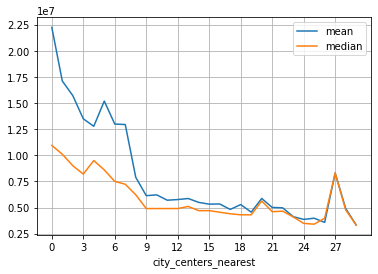

Изменение стоимости одного квадратного метра жилья


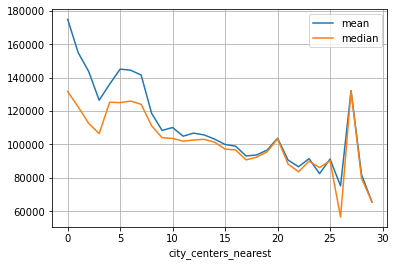

In [51]:
data_spb = data.query('locality_name == "Санкт-Петербург"').dropna(subset=['city_centers_nearest'])
data_spb['city_centers_nearest'] = (data_spb ['city_centers_nearest'] / 1000).astype('int')

print('Изменение стоимости квартир в целом')
data_spb.groupby('city_centers_nearest')['last_price'].agg(['mean','median']).plot(grid=True);
plt.xticks(np.arange(0,30, 3))
plt.show()

print('Изменение стоимости одного квадратного метра жилья')
data_spb.groupby('city_centers_nearest')['one_meter_price'].agg(['mean','median']).plot(grid=True);
plt.show()


График стоимости квартиры и квадратного метра квартиры имеет несколько очевидных точек на оси Х где значения стоимости начинают существенно изменяться.
- Видно что начиная с 7 километров от центра идет резкое падение и последующая стабилизация графика стоимости как квартиры в целом, так и квадратного метра жилья, следовательно будем считать 7 км - границей центра города.
- На отрезке между 25 и 28 км от центра присутствует выброс на графике - непропорционально высокая стоимость жилья.

In [52]:
#найдем странные выбросы в диапозоне от 25 до 28 метров
data_spb.query('25<city_centers_nearest<28').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,week_day_exposition,month_exposition,year_exposition,floor_type,living_total_ratio,kitchen_total_ratio
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,False,False,25.0,0.0,Санкт-Петербург,23888.0,27,1.0,1496.0,0.0,NaN,128.0,193918.918919,1,11,2017,Другой,0.405405,0.337838
5961,6,2250000.0,32.0,2018-02-27,1,2.70,2.0,16.5,2,False,False,False,7.0,0.0,Санкт-Петербург,24006.0,27,0.0,NaN,0.0,NaN,178.0,70312.500000,1,2,2018,Последний,0.515625,0.218750
7732,20,3975000.0,74.0,2018-08-20,3,3.20,3.0,43.8,2,False,False,False,14.0,0.0,Санкт-Петербург,22679.0,26,0.0,NaN,1.0,498.0,112.0,53716.216216,0,8,2018,Другой,0.591892,0.189189
14146,18,4150000.0,36.0,2018-09-05,1,2.50,10.0,20.0,7,False,False,False,7.0,1.0,Санкт-Петербург,22603.0,26,0.0,NaN,0.0,NaN,45.0,115277.777778,2,9,2018,Другой,0.555556,0.194444
18378,9,2600000.0,46.0,2017-11-10,1,2.70,2.0,20.0,1,False,False,False,15.0,0.0,Санкт-Петербург,22861.0,26,0.0,NaN,0.0,NaN,29.0,56521.739130,4,11,2017,Первый,0.434783,0.326087


На уровне значения 27 км от центра есть всего 2 предложения, одно из которых сильно смещает медиану и среднее - это двухкомнатная квартира стоимостью 14,3 млн рублей. Необходимо обратить дополнительное внимание на этот лот. Возможно это было какое-то уникальное предложение или ошибка данных

* Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [53]:
#исходя из полученных результатов анализа на предыдущем эатпе, выделим квартиры центра города
data_spb_center = data_spb.query('city_centers_nearest < 7')


total_area центр Петербурга


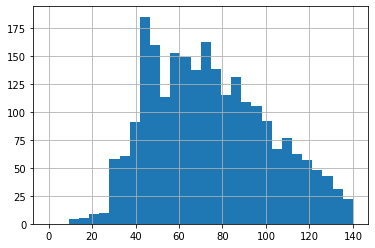

total_area знчения всего датасета


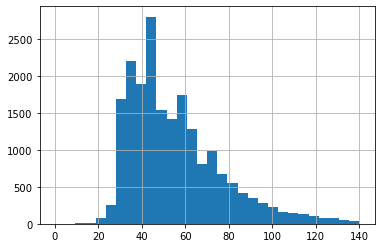

last_price центр Петербурга


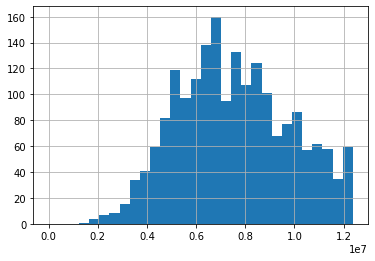

last_price знчения всего датасета


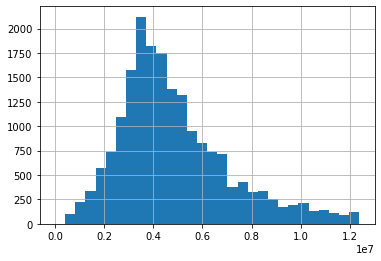

one_meter_price центр Петербурга


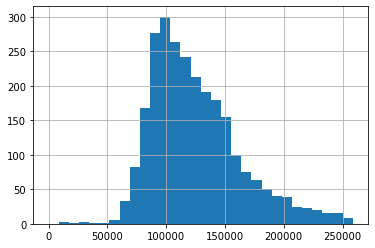

one_meter_price знчения всего датасета


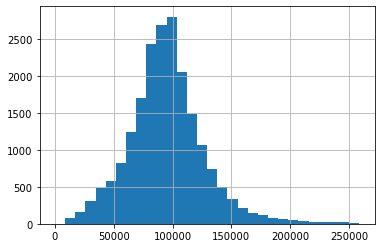

rooms центр Петербурга


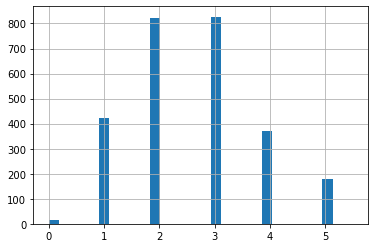

rooms знчения всего датасета


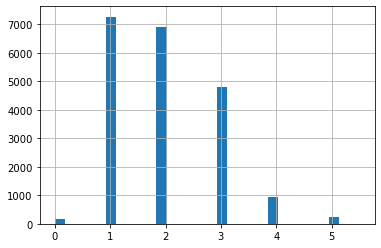

ceiling_height центр Петербурга


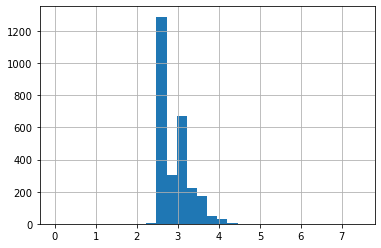

ceiling_height знчения всего датасета


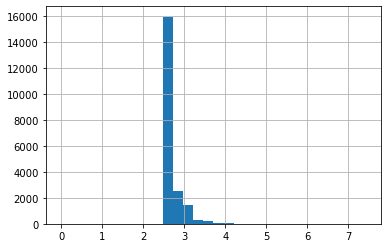

In [54]:
# создание графиков по центру Санкт-Петербурга и по всему датасету вцелом, для дальнейшего сравнения
city_center_list = ['total_area','last_price','one_meter_price','rooms','ceiling_height']
for i in city_center_list:
    print(i, 'центр Петербурга')
    data_spb_center[i].hist(bins=30,range=(0,data[i].median()*(1.25+1.5)))
    plt.show()
    print(i, 'знчения всего датасета')
    data[i].hist(bins=30,range=(0,data[i].median()*(1.25+1.5)))
    plt.show()

Сравнение данных по всему датасету с данными по центру Санкт-Петербурга показывает следующие результаты:
1. В центре города обычно продаются квартиры от 40 до 90 метров. При этом количество квартир в этом диапазоне в целом сопоставимо. В целом по датасету больше всего продано квартир от 30 до 50 метров, после 60 метров гистограмма показыввает существенное снижение количества предложений
2. Стоимость квартир центра города принимает значения от 5 до 10 млн рублей за лот. Больше всего квартир продается в диапозоне между 6-8 миллонами рублей. При этом квартир стоимостью менее 4 млн. значительно меньше. По данным всего датасета стоимости квартир распределены нормально, больше всего предложений между 3-5 млн рублей.
3. Стоимость квадратного метра центра показвает наибольшую частотность в диапозоне от 90 до 150 тысяч рублей за квадрат. Стоимостей меньше 60 тысяч рублей практически не встречается. По всему датасету распределение смещено влево и стремится к нормальному. Больше всего предложений от 70 до 100 тыс за кварат, при этом занчительно чаще встречаются квартиры, стоимостью от 30 до 50 тысяч
4. Значения количества комнат в центре города в большей степени принимают значения 2 и 3 комнаты, при этом имеется порядка 400 четырехкомнтаных квартир и около 200 пятикомнатных квартир. По всему датасету преобладают однокомнатные и двухкомнатные квартиры, тогда как квартиры с большим количеством комнат встречаются значительно реже
5. Высота потолков в квартирах центра города чаще всего принимает значение 2,5-2,7 метров. При этом сущесвтует пик на зачениях 3-3,5 метра. По всему датасету видно значинтельное преобладание квартир с более низкими потолками 2,5 метра

In [55]:
data_spb_center[['last_price','one_meter_price', 'total_area','rooms','ceiling_height','city_centers_nearest']].corr()

,last_price,one_meter_price,total_area,rooms,ceiling_height,city_centers_nearest
last_price,1.000000,0.817458,0.604715,0.314603,0.107610,-0.044059
one_meter_price,0.817458,1.000000,0.270580,0.020740,0.040618,-0.020363
total_area,0.604715,0.270580,1.000000,0.734059,0.253175,-0.082848
rooms,0.314603,0.020740,0.734059,1.000000,0.225751,-0.169108
ceiling_height,0.107610,0.040618,0.253175,0.225751,1.000000,-0.191833
city_centers_nearest,-0.044059,-0.020363,-0.082848,-0.169108,-0.191833,1.000000


Стоимость квартир центра Санкт-Петербурга в большей степени коррелирует с общей площадью (коэфф. корреляции = 0.6) и в меньшей степени с количестовом комнат (коэфф. корреляции = 0.3). Незанчительная корреляция с высотой потолков (коэфф. корреляции = 0.1). При этом близость к географической точке центра в границах 7 км совершенно не существенный фактор для стоимости.

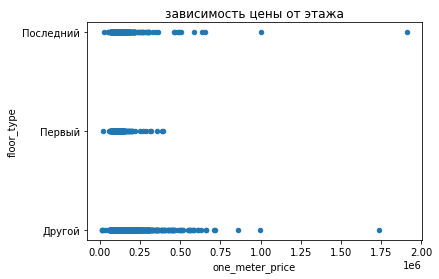

In [56]:
data_spb_center.plot(x='one_meter_price', y='floor_type', kind='scatter')
plt.title('зависимость цены от этажа');

зависимость от этажа для центра города аналогична показателям для всего датасета. Среди квартир на первом этаже нет квартир дороже 50 тыс. рублей за кв.метр. Наиболее распространены дорогие квартиры на этаже, не являющимся ни первым ни последним.

In [57]:
data_spb_center[['last_price','one_meter_price','week_day_exposition','month_exposition','year_exposition']].corr()


,last_price,one_meter_price,week_day_exposition,month_exposition,year_exposition
last_price,1.000000,0.817458,0.028310,-0.004634,-0.065493
one_meter_price,0.817458,1.000000,0.031395,0.001580,-0.015292
week_day_exposition,0.028310,0.031395,1.000000,0.029542,0.017685
month_exposition,-0.004634,0.001580,0.029542,1.000000,-0.174102
year_exposition,-0.065493,-0.015292,0.017685,-0.174102,1.000000


Зависимость стоимость кваритры в центре города от даты размещения объявления не прослеживается

## Общий вывод

В рамках работы над выгрузкой архива о продаже квартир в Санкт-Петербурге и населенных пунктах Ленинградской области проведена предобработка датасета, удалены данные, неподходящие для анализа - квартиры, по которым нет информации о свершившемся факте продажи. Медианными значениями заполнены пропуски в отдельных категориях данных. 

Для предобработанных данных посчитана стоимость квадратногом метра каждой квартиры, сформированы категории этажности квартир, посчитано соотношение общей площади к жилой площади и площади кухни

В рамках исследовательского анализа данных сделаны следующие выводы:

- По всему датасету наиболее распространенными являются сделки с квартирами до 100 квадратных метров.
- Абсолютные значения цены квартиры чаще всего входят в диапозон от 2 до 7 млн рублей. 
- Стоимость квадратного метра квартиры стремится к нормальному распределению. Наиболее частая цена входит в диапозон от  5 до 15 тыс. рублей за кв.м.
- Больше всего сделок совершено с квартирами, в которых количество комнат от 1 до 3. 
- Высота потолков чаще всего принимает значение от 2,4 до 2,75 метра.
- С увеличением времени экспонирования квартиры - снижается количество завершенных сделок по продаже
- Медианное значение времени продажи составляет 95 дней
- Все сделки, которые были совершены менее чем за 45 дней можно считать быстрыми, а в случае, если объявление находилось на сайте дольше 232 дней - долгими
- на конечную цену квартиры значительным образом влияет ее площадь. Коэфф. корелляции принимает значение 0.6. 
- количество комнтат незначительно влияет на конечную стоимость квартиры. Коэфф. корреляции составляет 0.3
- Расстояние от центра влияет как на конечную стоимость квартиры, так и на стоимость квадратного метра жилья. При этом корреляция отрицатиельная и принимает значение -0.19 и -0.3 соответственно.
- Из данных о квартирах в центре Санкт-Петербурга были выделены квартиры центра города - это квартиры в радиусе 7 км от географического центра. По данным квартирам проведен анализ корреляции стоимости и характеристик.
- Для квартир в радиусе 7 км близость к центру не имеет определяющего влияния на стоимость
- Важным фактором для цены является общая площадь и количество комнат. Коэффициент корреляции принимает значения 06. и 0.3, что сопоставимо с данными по всему датасету в целом.
-  В центре города обычно продаются квартиры от 40 до 90 метров.
- Больше всего квартир продается в диапозоне между 6-8 миллонами рублей. 
- Стоимость квадратного метра квартиры в центре центра показвает наибольшую частотность в диапозоне от 90 до 150 тысяч рублей за квадрат. 
- Значения количества комнат в центре города в большей степени принимают значения 2 и 3 комнаты, при этом имеется порядка 400 четырехкомнтаных квартир и около 200 пятикомнатных квартир.
- Высота потолков в квартирах центра города чаще всего принимает значение 2,5-2,7 метров.
